In [149]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [150]:
import os
import sys
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
import mir_eval
import scipy
import librosa
import tqdm
import copy

import models
import datasets
import oracles
import metrics
import utils
import change_point_detection as cpd
import query_strategies as qs
import evaluate
import visualize

import metrics

import matplotlib.pyplot as plt
import matplotlib

In [151]:
def list_difference(l1, l2):
    return list(set(l1).difference(l2))

In [220]:
snr = '0.0'


# # example 1, 3 second window, 0.5 second hop length
# base_dir = '/mnt/storage_1/datasets/bioacoustic_sed/generated_datasets/me_3.0s/train_soundscapes_snr_{}/'.format(snr)
# test_base_dir = '/mnt/storage_1/datasets/bioacoustic_sed/generated_datasets/me_3.0s/test_soundscapes_snr_{}/'.format(snr)

# # example 2, 1 second window, 0.5 second hop length
# base_dir = '/mnt/storage_1/datasets/bioacoustic_sed/generated_datasets/me_1.0s/train_soundscapes_snr_{}/'.format(snr)
# test_base_dir = '/mnt/storage_1/datasets/bioacoustic_sed/generated_datasets/me_1.0s/test_soundscapes_snr_{}/'.format(snr)

# example 3, 0.8 second window, 0.25 second hop length
base_dir = '/mnt/storage_1/datasets/bioacoustic_sed/generated_datasets/me_0.8s_0.25s/train_soundscapes_snr_{}/'.format(snr)
test_base_dir = '/mnt/storage_1/datasets/bioacoustic_sed/generated_datasets/me_0.8s_0.25s/test_soundscapes_snr_{}/'.format(snr)

n_soundscapes = 20

query_strategy_0 = models.AdaptiveQueryStrategy(base_dir, random_soundscape=False, fixed_queries=False)
query_strategy_1 = models.AdaptiveQueryStrategy(base_dir, random_soundscape=True,  fixed_queries=False)
query_strategy_2 = models.AdaptiveQueryStrategy(base_dir, random_soundscape=False, fixed_queries=True)
query_strategy_3 = models.AdaptiveQueryStrategy(base_dir, random_soundscape=True,  fixed_queries=True)

all_soundscape_basenames = ['soundscape_{}'.format(idx) for idx in range(n_soundscapes)]
init_idx = 0
init_soundscape_basename = all_soundscape_basenames[init_idx]

print(init_soundscape_basename)

# initialize strategies with ground truth labels for supplied soundscape
query_strategy_0.initialize_with_ground_truth_labels(init_soundscape_basename)
query_strategy_1.initialize_with_ground_truth_labels(init_soundscape_basename)
query_strategy_2.initialize_with_ground_truth_labels(init_soundscape_basename)
query_strategy_3.initialize_with_ground_truth_labels(init_soundscape_basename)

remaining_soundscape_basenames = list_difference(all_soundscape_basenames, [init_soundscape_basename])
remaining_soundscape_basenames = sorted(remaining_soundscape_basenames)

soundscape_0


In [221]:
print(remaining_soundscape_basenames)

['soundscape_1', 'soundscape_10', 'soundscape_11', 'soundscape_12', 'soundscape_13', 'soundscape_14', 'soundscape_15', 'soundscape_16', 'soundscape_17', 'soundscape_18', 'soundscape_19', 'soundscape_2', 'soundscape_3', 'soundscape_4', 'soundscape_5', 'soundscape_6', 'soundscape_7', 'soundscape_8', 'soundscape_9']


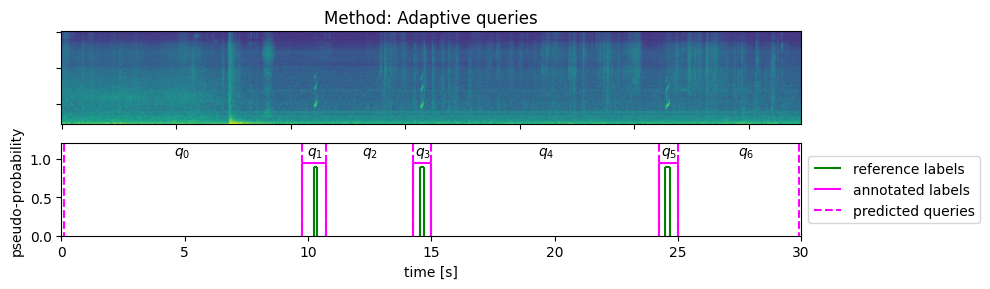

In [222]:
soundscape_basename = remaining_soundscape_basenames[6]
n_queries = 7

visualize.visualize_query_strategy(
    query_strategy_1,
    "Adaptive queries",
    soundscape_basename,
    base_dir,
    n_queries,
    vis_probs     = False,
    vis_queries   = True,
    vis_label     = True,
    vis_threshold = False,
    vis_cpd       = False,
    vis_peaks     = False,
    savefile      = None,
)

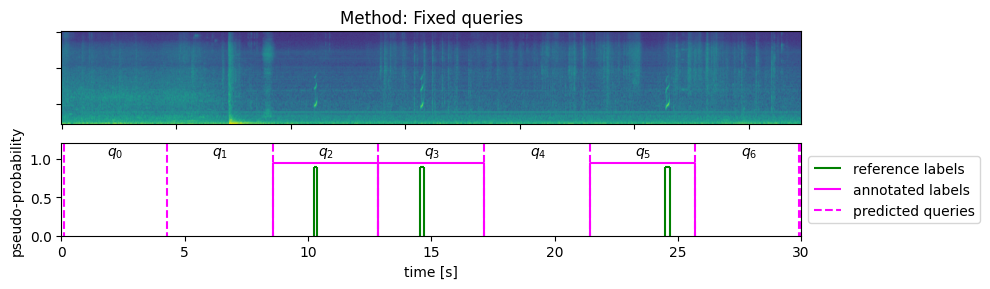

In [223]:
visualize.visualize_query_strategy(
    query_strategy_3,
    "Fixed queries",
    soundscape_basename,
    base_dir,
    n_queries,
    vis_probs     = False,
    vis_queries   = True,
    vis_label     = True,
    vis_threshold = False,
    vis_cpd       = False,
    vis_peaks     = False,
    savefile      = None,
)

In [224]:
oracle = oracles.WeakLabelOracle(base_dir)
queries_1  = query_strategy_1.predict_queries(soundscape_basename, n_queries)
pos_pred_1 = oracle.pos_events_from_queries(queries_1, soundscape_basename)

queries_3  = query_strategy_3.predict_queries(soundscape_basename, n_queries)
pos_pred_3 = oracle.pos_events_from_queries(queries_3, soundscape_basename)

In [225]:
p_emb_1, n_emb_1 = evaluate.get_embeddings_2(pos_pred_1, base_dir, soundscape_basename)
query_strategy_1.update(p_emb_1, n_emb_1)
p_emb_3, n_emb_3 = evaluate.get_embeddings_2(pos_pred_3, base_dir, soundscape_basename)
query_strategy_3.update(p_emb_3, n_emb_3)

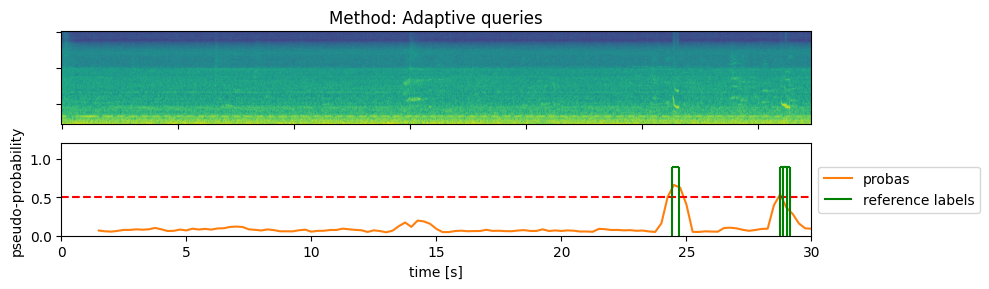

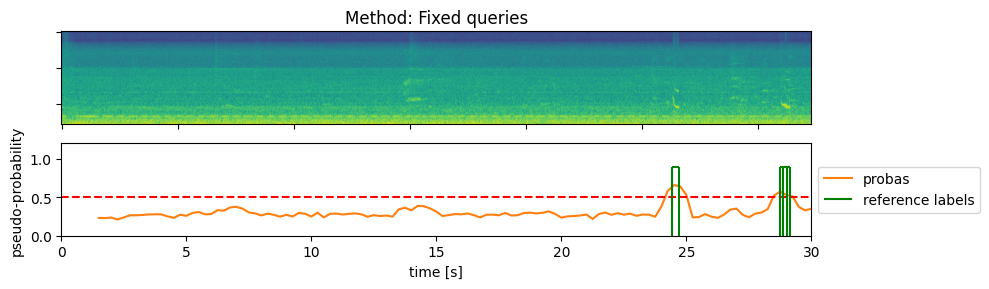

In [231]:
visualize.visualize_query_strategy(
    query_strategy_1,
    "Adaptive queries",
    soundscape_basename,
    test_base_dir,
    n_queries,
    vis_probs     = True,
    vis_queries   = False,
    vis_label     = False,
    vis_threshold = True,
    vis_cpd       = False,
    vis_peaks     = False,
    savefile      = None,
)

visualize.visualize_query_strategy(
    query_strategy_3,
    "Fixed queries",
    soundscape_basename,
    test_base_dir,
    n_queries,
    vis_probs     = True,
    vis_queries   = False,
    vis_label     = False,
    vis_threshold = True,
    vis_cpd       = False,
    vis_peaks     = False,
    savefile      = None,
)

# Presentation figures

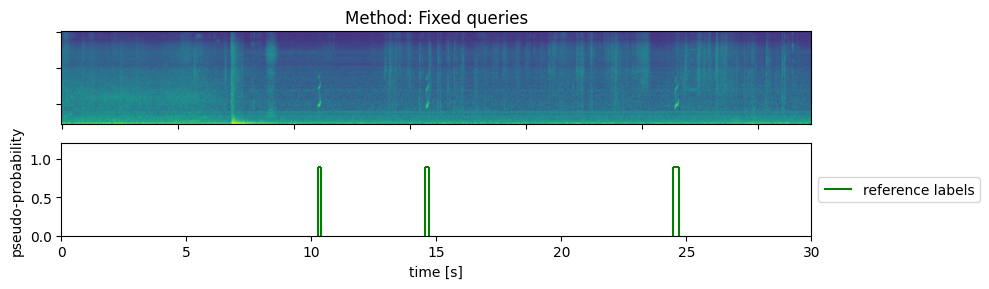

In [232]:
soundscape_basename = remaining_soundscape_basenames[6]
n_queries = 7

presentation_dir = 'presentation'
if not os.path.exists(presentation_dir):
    os.makedirs(presentation_dir)

figure_name = 'fixed_0.png'
savefile    = os.path.join(presentation_dir, figure_name)

visualize.visualize_query_strategy(
    query_strategy_3,
    "Fixed queries",
    soundscape_basename,
    base_dir,
    n_queries,
    vis_probs     = False,
    vis_queries   = False,
    vis_label     = False,
    vis_threshold = False,
    vis_cpd       = False,
    vis_peaks     = False,
    savefile      = None,
)

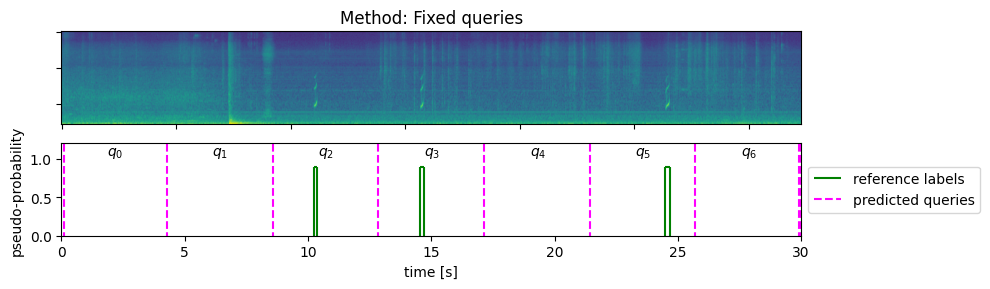

In [233]:
soundscape_basename = remaining_soundscape_basenames[6]
n_queries = 7

presentation_dir = 'presentation'
if not os.path.exists(presentation_dir):
    os.makedirs(presentation_dir)

figure_name = 'fixed_1.png'
savefile    = os.path.join(presentation_dir, figure_name)

visualize.visualize_query_strategy(
    query_strategy_3,
    "Fixed queries",
    soundscape_basename,
    base_dir,
    n_queries,
    vis_probs     = False,
    vis_queries   = True,
    vis_label     = False,
    vis_threshold = False,
    vis_cpd       = False,
    vis_peaks     = False,
    savefile      = None,
)

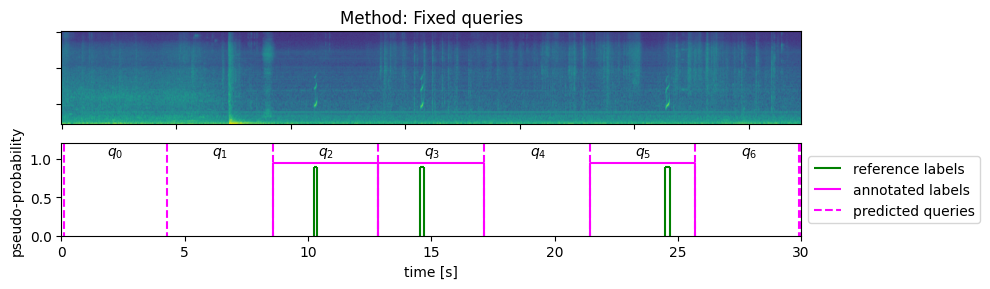

In [234]:
soundscape_basename = remaining_soundscape_basenames[6]
n_queries = 7

presentation_dir = 'presentation'
if not os.path.exists(presentation_dir):
    os.makedirs(presentation_dir)

figure_name = 'fixed_2.png'
savefile    = os.path.join(presentation_dir, figure_name)

visualize.visualize_query_strategy(
    query_strategy_3,
    "Fixed queries",
    soundscape_basename,
    base_dir,
    n_queries,
    vis_probs     = False,
    vis_queries   = True,
    vis_label     = True,
    vis_threshold = False,
    vis_cpd       = False,
    vis_peaks     = False,
    savefile      = None,
)

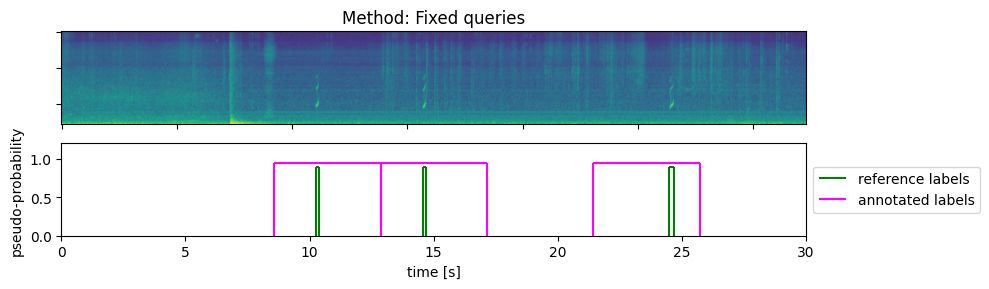

In [235]:
soundscape_basename = remaining_soundscape_basenames[6]
n_queries = 7

presentation_dir = 'presentation'
if not os.path.exists(presentation_dir):
    os.makedirs(presentation_dir)

figure_name = 'fixed_3.png'
savefile    = os.path.join(presentation_dir, figure_name)

visualize.visualize_query_strategy(
    query_strategy_3,
    "Fixed queries",
    soundscape_basename,
    base_dir,
    n_queries,
    vis_probs     = False,
    vis_queries   = False,
    vis_label     = True,
    vis_threshold = False,
    vis_cpd       = False,
    vis_peaks     = False,
    savefile      = None,
)

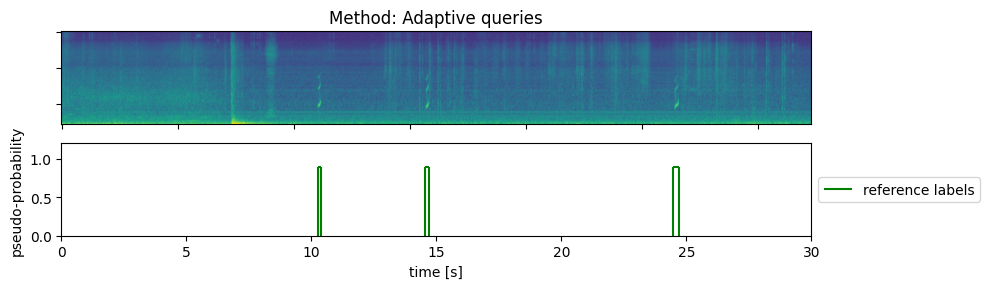

In [240]:
soundscape_basename = remaining_soundscape_basenames[6]
n_queries = 7

presentation_dir = 'presentation'
if not os.path.exists(presentation_dir):
    os.makedirs(presentation_dir)

figure_name = 'adaptive_0.png'
savefile    = os.path.join(presentation_dir, figure_name)

visualize.visualize_query_strategy(
    query_strategy_1,
    "Adaptive queries",
    soundscape_basename,
    base_dir,
    n_queries,
    vis_probs     = False,
    vis_queries   = False,
    vis_label     = False,
    vis_threshold = False,
    vis_cpd       = False,
    vis_peaks     = False,
    savefile=savefile,
)

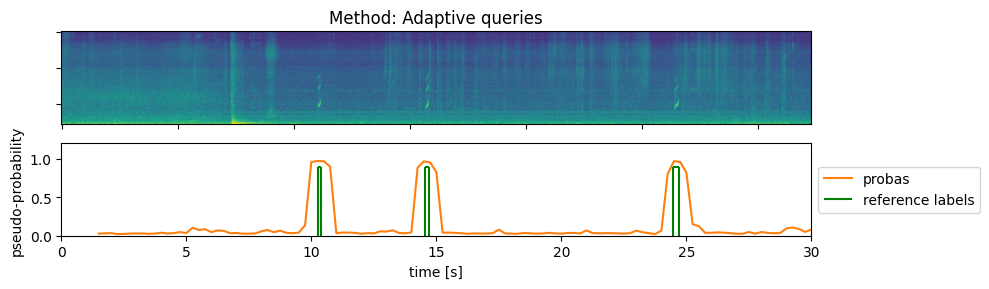

In [241]:
# noisy example, 7

presentation_dir = 'presentation'
if not os.path.exists(presentation_dir):
    os.makedirs(presentation_dir)

figure_name = 'adaptive_1.png'
savefile    = os.path.join(presentation_dir, figure_name)

visualize.visualize_query_strategy(
    query_strategy_1,
    "Adaptive queries",
    soundscape_basename,
    base_dir,
    n_queries,
    vis_probs     = True,
    vis_queries   = False,
    vis_label     = False,
    vis_threshold = False,
    vis_cpd       = False,
    vis_peaks     = False,
    savefile=savefile,
)

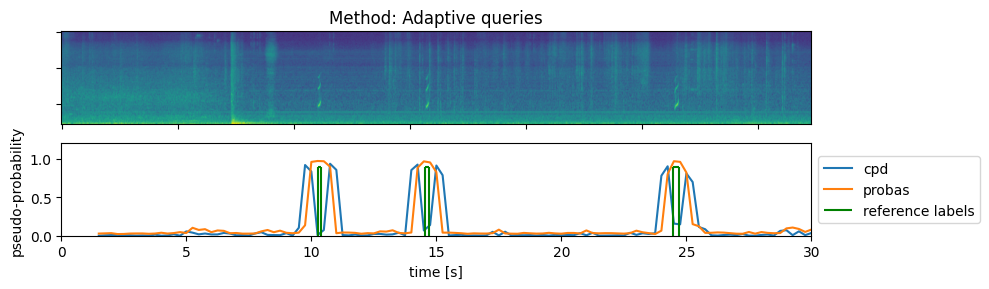

In [242]:
presentation_dir = 'presentation'
if not os.path.exists(presentation_dir):
    os.makedirs(presentation_dir)

figure_name = 'adaptive_2.png'
savefile    = os.path.join(presentation_dir, figure_name)

visualize.visualize_query_strategy(
    query_strategy_1,
    "Adaptive queries",
    soundscape_basename,
    base_dir,
    n_queries,
    vis_probs     = True,
    vis_queries   = False,
    vis_label     = False,
    vis_threshold = False,
    vis_cpd       = True,
    vis_peaks     = False,
    savefile=savefile,
)

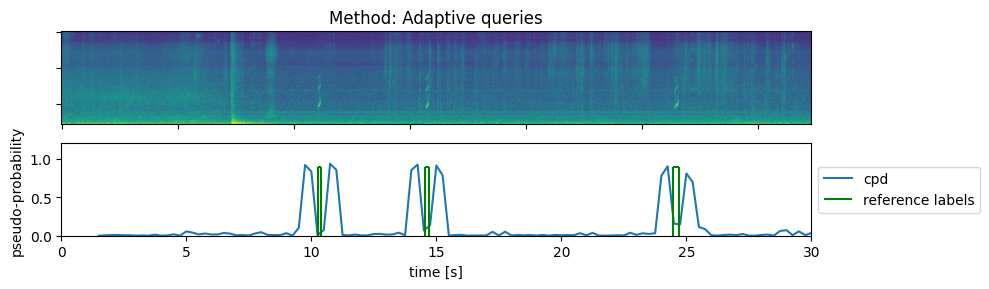

In [243]:

presentation_dir = 'presentation'
if not os.path.exists(presentation_dir):
    os.makedirs(presentation_dir)

figure_name = 'adaptive_3.png'
savefile    = os.path.join(presentation_dir, figure_name)

visualize.visualize_query_strategy(
    query_strategy_1,
    "Adaptive queries",
    soundscape_basename,
    base_dir,
    n_queries,
    vis_probs     = False,
    vis_queries   = False,
    vis_label     = False,
    vis_threshold = False,
    vis_cpd       = True,
    vis_peaks     = False,
    savefile=savefile,
)

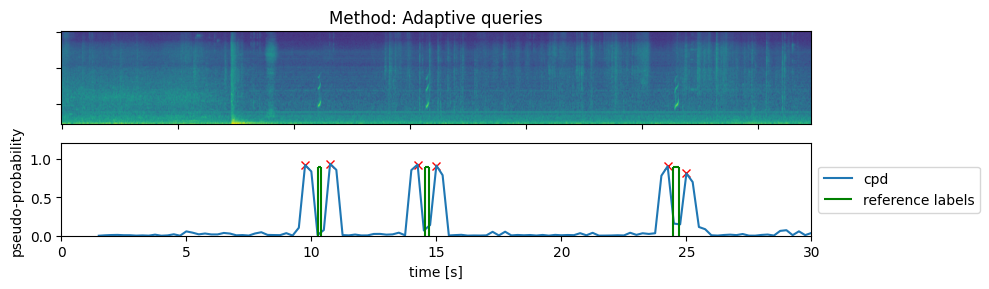

In [244]:

presentation_dir = 'presentation'
if not os.path.exists(presentation_dir):
    os.makedirs(presentation_dir)

figure_name = 'adaptive_4.png'
savefile    = os.path.join(presentation_dir, figure_name)

visualize.visualize_query_strategy(
    query_strategy_1,
    "Adaptive queries",
    soundscape_basename,
    base_dir,
    n_queries,
    vis_probs     = False,
    vis_queries   = False,
    vis_label     = False,
    vis_threshold = False,
    vis_cpd       = True,
    vis_peaks     = True,
    savefile=savefile,
)

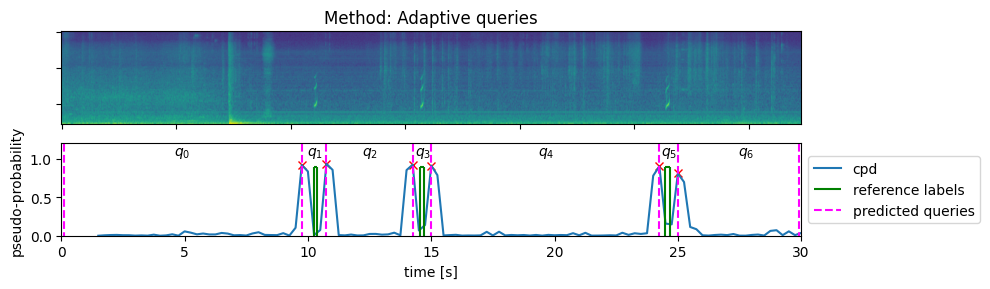

In [245]:

presentation_dir = 'presentation'
if not os.path.exists(presentation_dir):
    os.makedirs(presentation_dir)

figure_name = 'adaptive_5.png'
savefile    = os.path.join(presentation_dir, figure_name)

visualize.visualize_query_strategy(
    query_strategy_1,
    "Adaptive queries",
    soundscape_basename,
    base_dir,
    n_queries,
    vis_probs     = False,
    vis_queries   = True,
    vis_label     = False,
    vis_threshold = False,
    vis_cpd       = True,
    vis_peaks     = True,
    savefile=savefile,
)

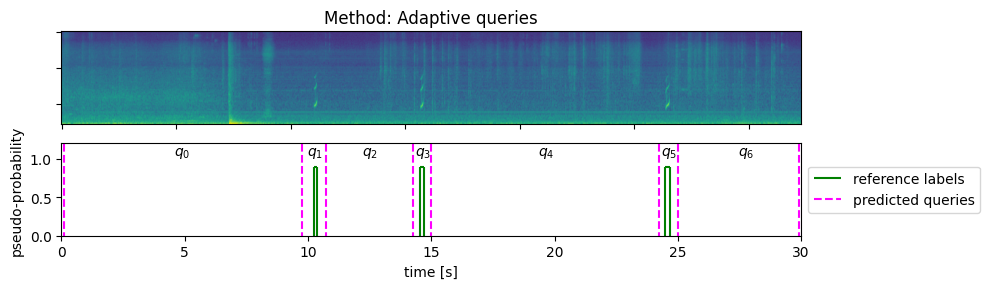

In [246]:

presentation_dir = 'presentation'
if not os.path.exists(presentation_dir):
    os.makedirs(presentation_dir)

figure_name = 'adaptive_5.png'
savefile    = os.path.join(presentation_dir, figure_name)

visualize.visualize_query_strategy(
    query_strategy_1,
    "Adaptive queries",
    soundscape_basename,
    base_dir,
    n_queries,
    vis_probs     = False,
    vis_queries   = True,
    vis_label     = False,
    vis_threshold = False,
    vis_cpd       = False,
    vis_peaks     = False,
    savefile=savefile,
)

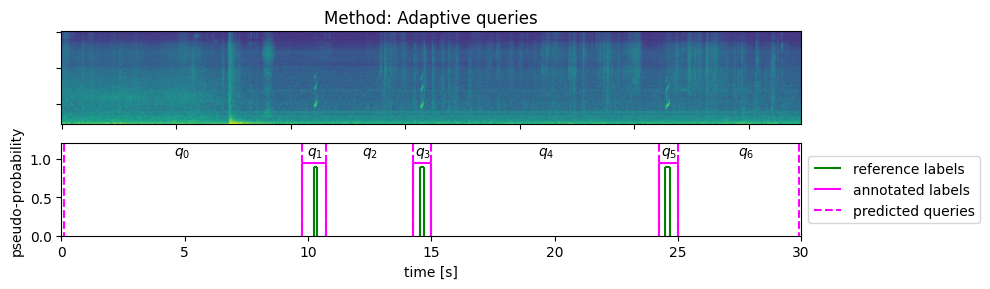

In [247]:

presentation_dir = 'presentation'
if not os.path.exists(presentation_dir):
    os.makedirs(presentation_dir)

figure_name = 'adaptive_5.png'
savefile    = os.path.join(presentation_dir, figure_name)

visualize.visualize_query_strategy(
    query_strategy_1,
    "Adaptive queries",
    soundscape_basename,
    base_dir,
    n_queries,
    vis_probs     = False,
    vis_queries   = True,
    vis_label     = True,
    vis_threshold = False,
    vis_cpd       = False,
    vis_peaks     = False,
    savefile=savefile,
)

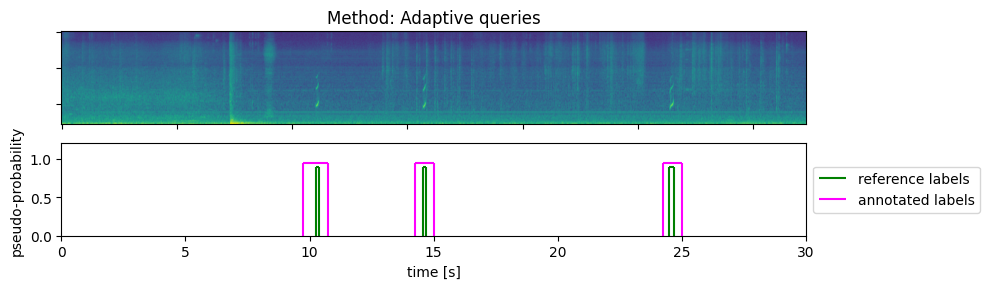

In [248]:

presentation_dir = 'presentation'
if not os.path.exists(presentation_dir):
    os.makedirs(presentation_dir)

figure_name = 'adaptive_5.png'
savefile    = os.path.join(presentation_dir, figure_name)

visualize.visualize_query_strategy(
    query_strategy_1,
    "Adaptive queries",
    soundscape_basename,
    base_dir,
    n_queries,
    vis_probs     = False,
    vis_queries   = False,
    vis_label     = True,
    vis_threshold = False,
    vis_cpd       = False,
    vis_peaks     = False,
    savefile=savefile,
)

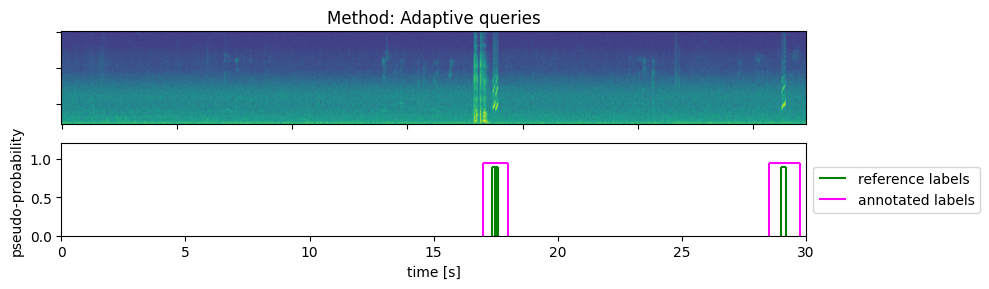

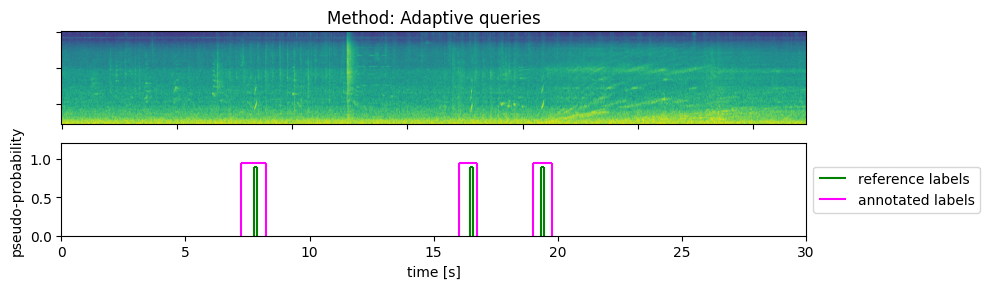

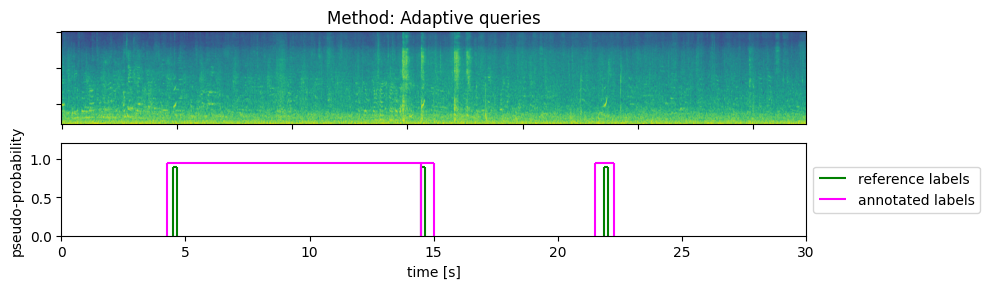

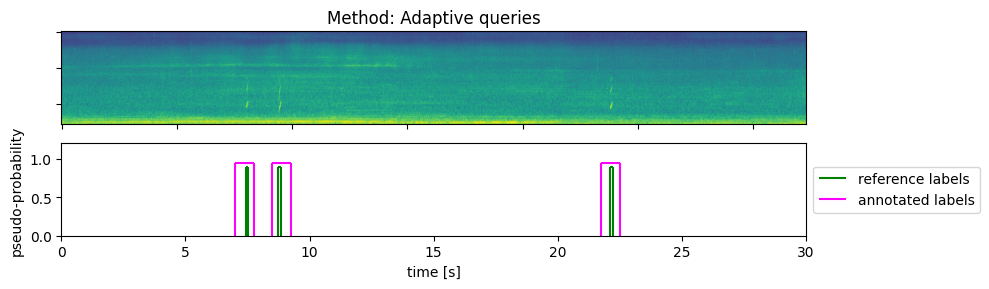

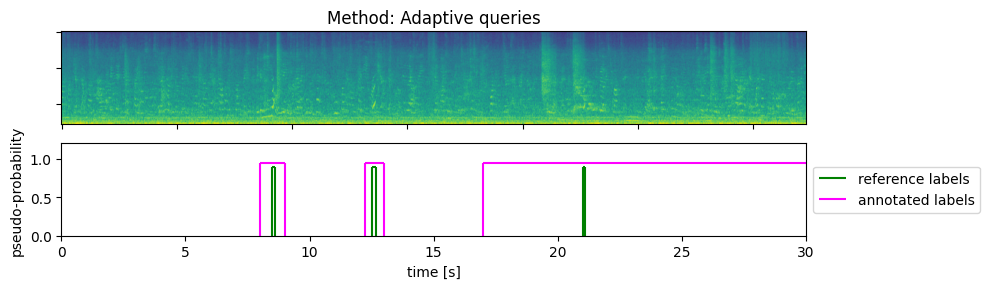

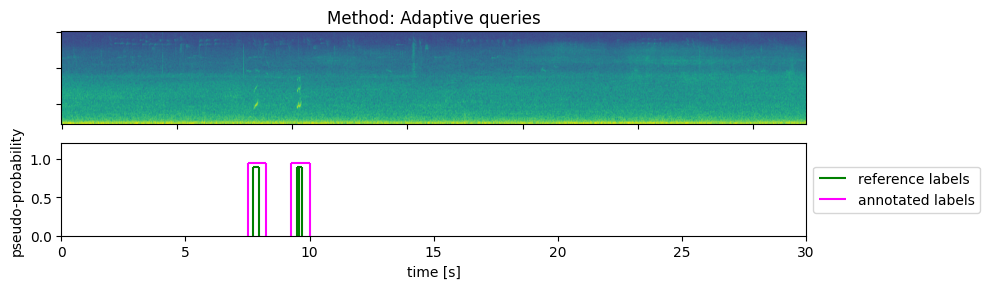

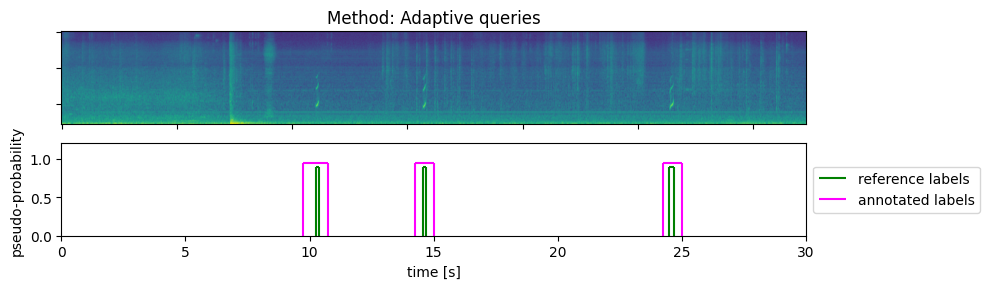

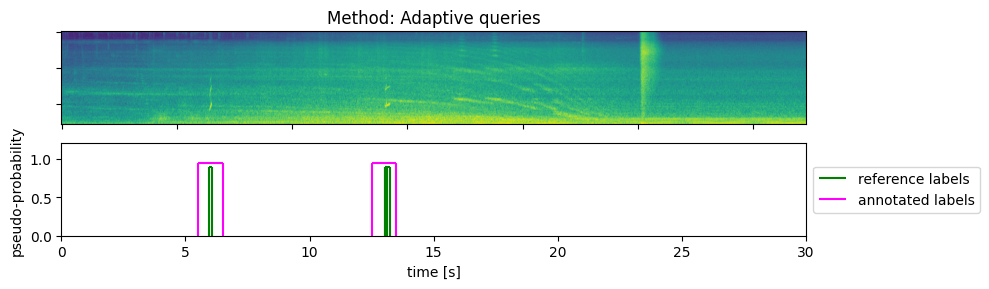

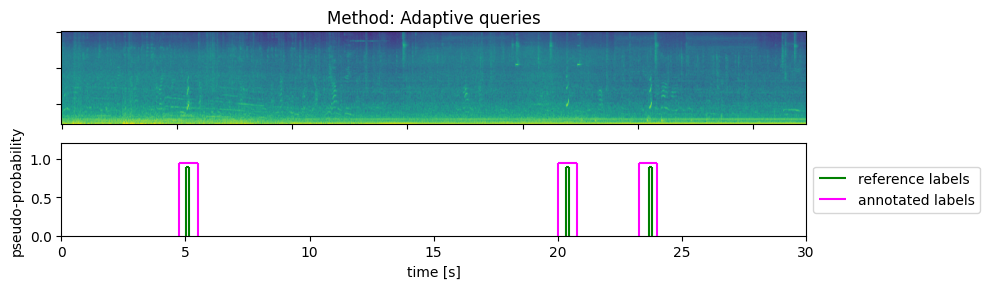

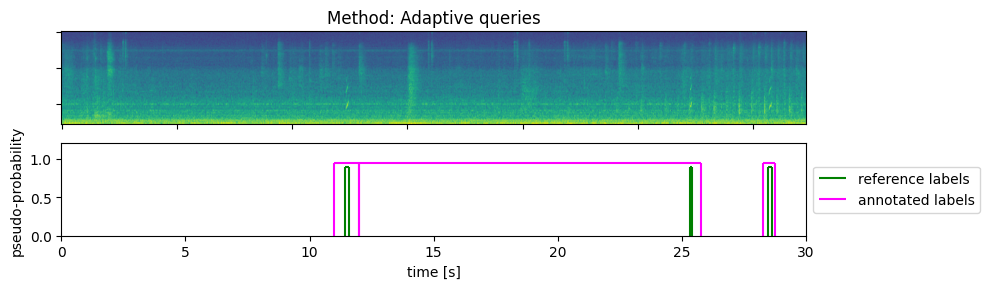

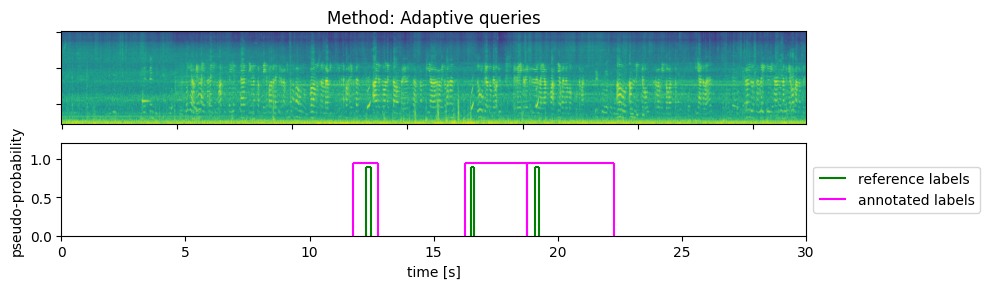

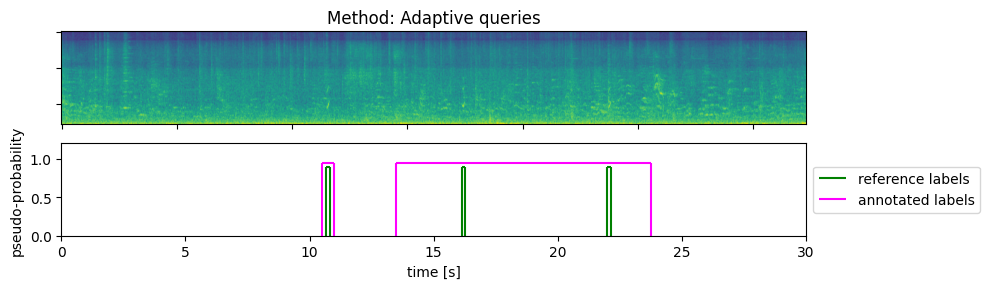

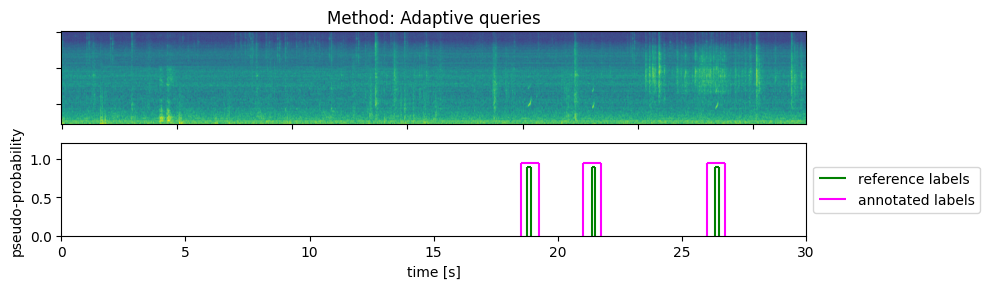

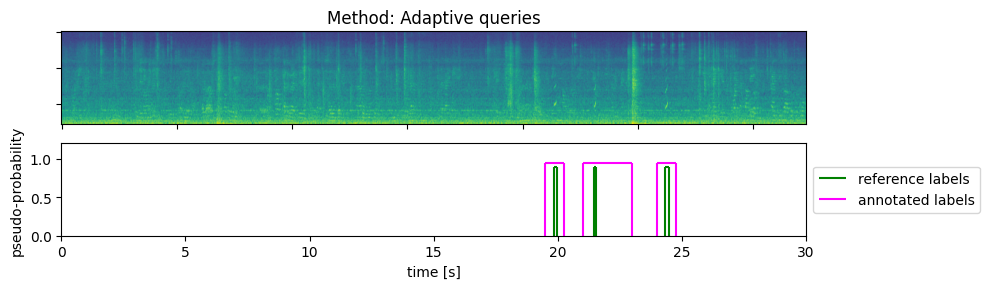

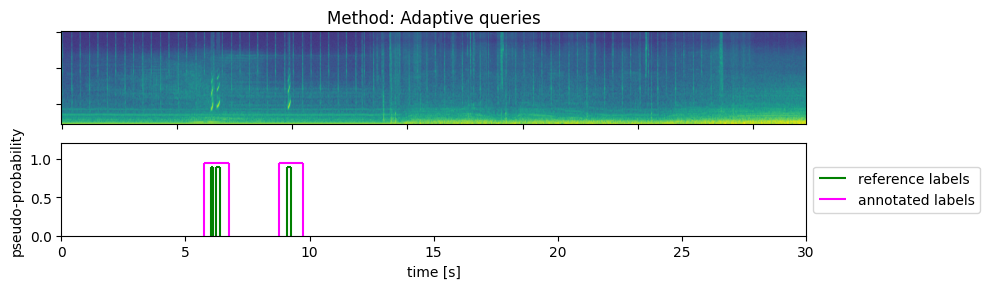

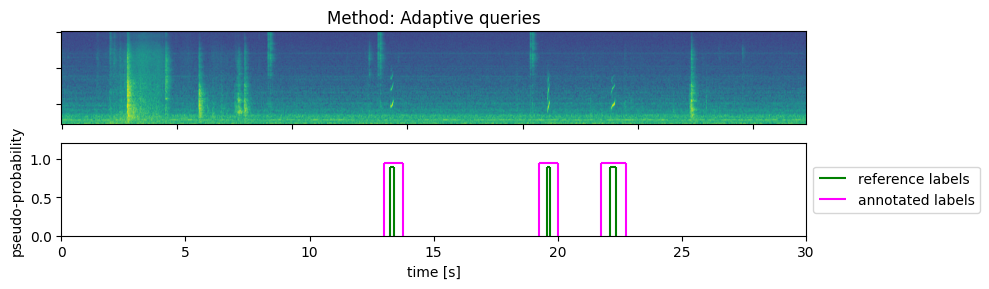

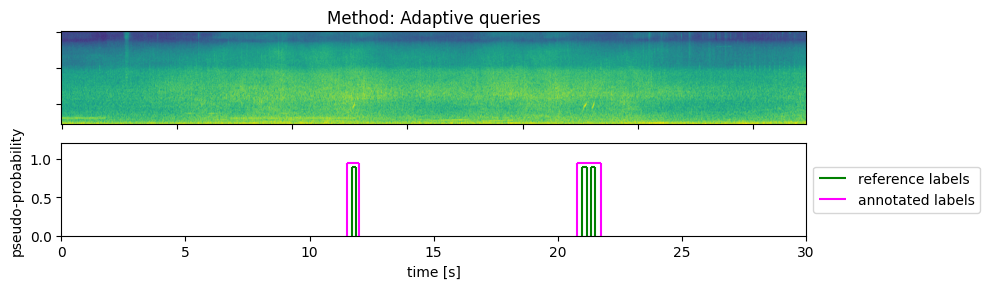

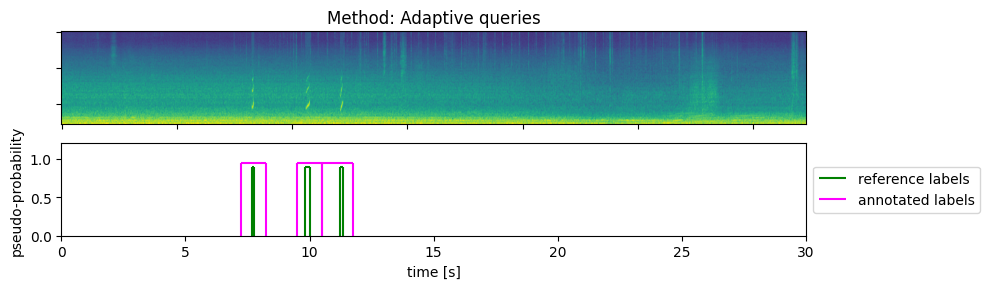

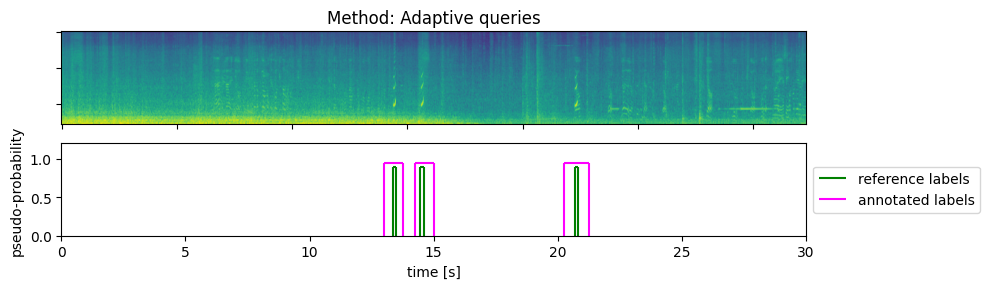

In [249]:
for soundscape_basename in remaining_soundscape_basenames:

    presentation_dir = 'presentation'
    if not os.path.exists(presentation_dir):
        os.makedirs(presentation_dir)
    
    figure_name = 'adaptive_labels_{}.png'.format(soundscape_basename)
    savefile    = os.path.join(presentation_dir, figure_name)
    
    visualize.visualize_query_strategy(
        query_strategy_1,
        "Adaptive queries",
        soundscape_basename,
        base_dir,
        n_queries,
        vis_probs     = False,
        vis_queries   = False,
        vis_label     = True,
        vis_threshold = False,
        vis_cpd       = False,
        vis_peaks     = False,
        savefile=savefile,
    )

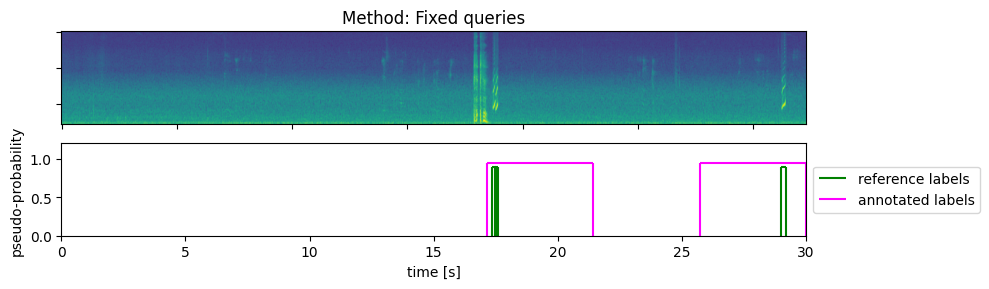

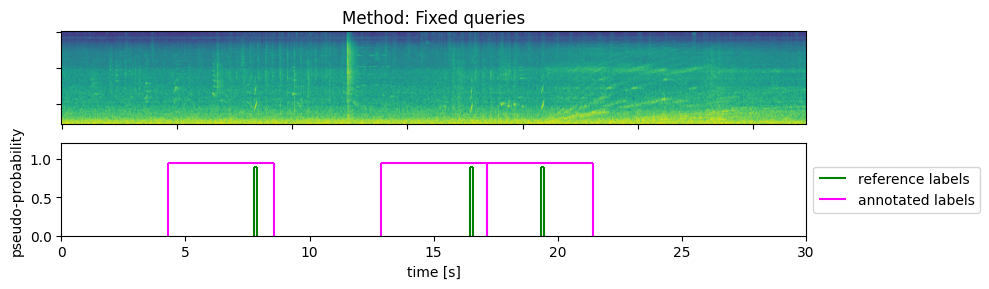

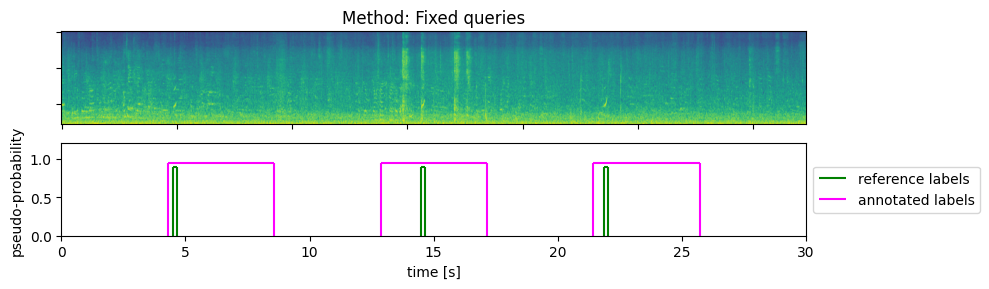

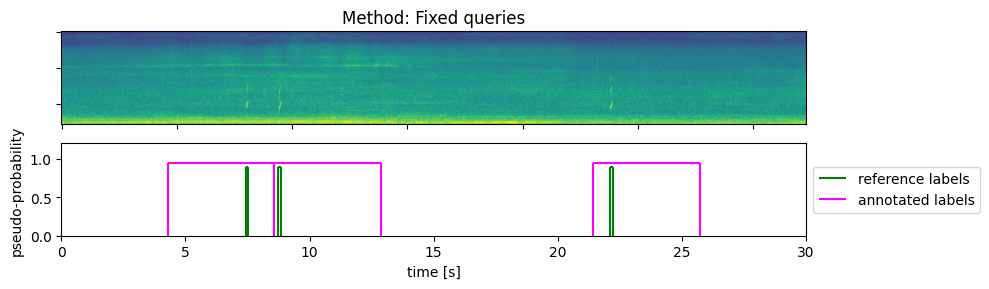

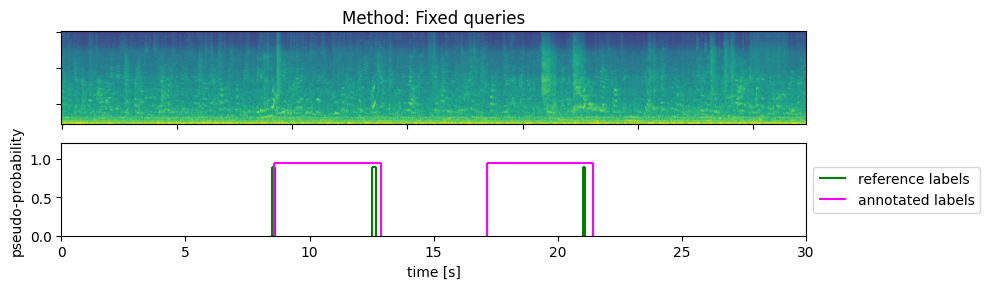

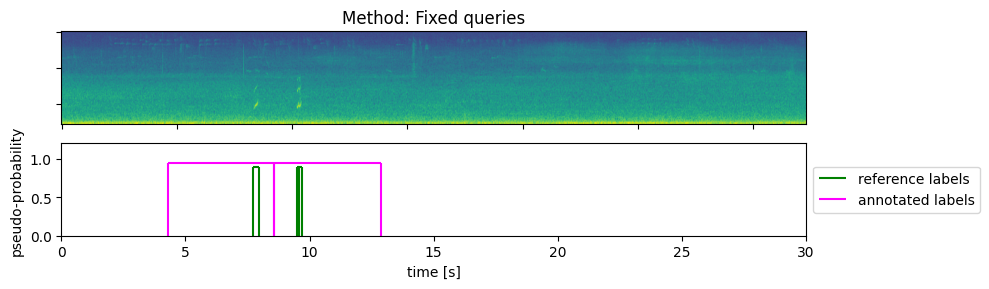

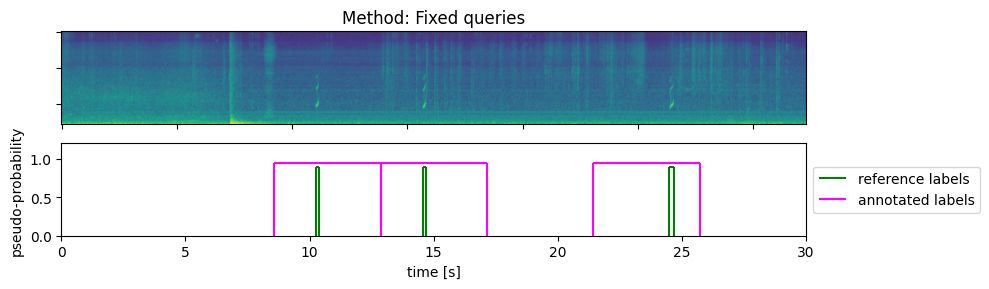

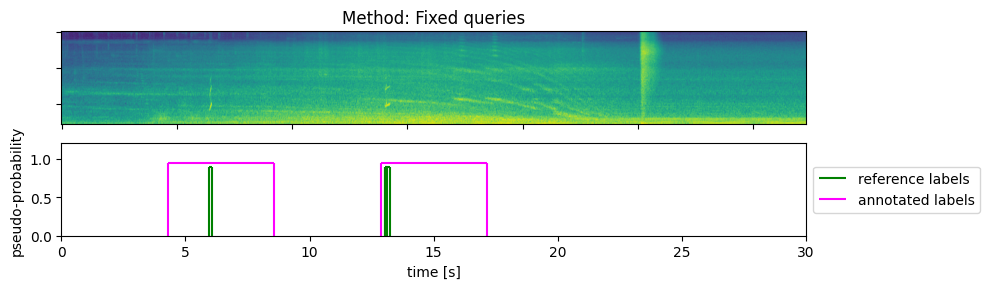

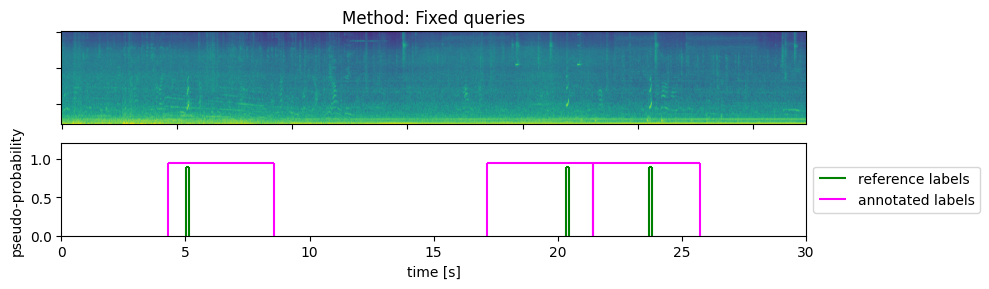

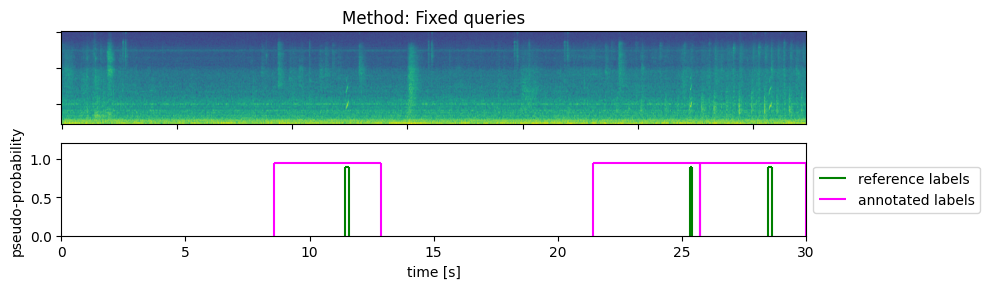

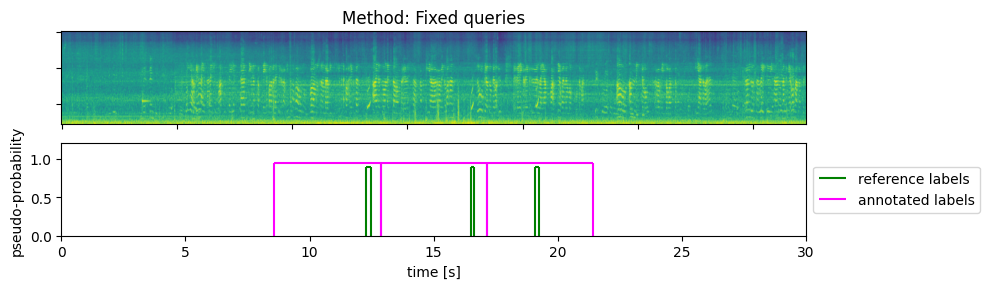

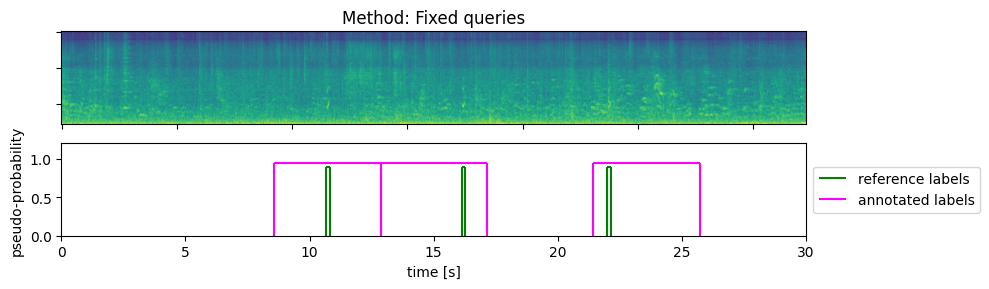

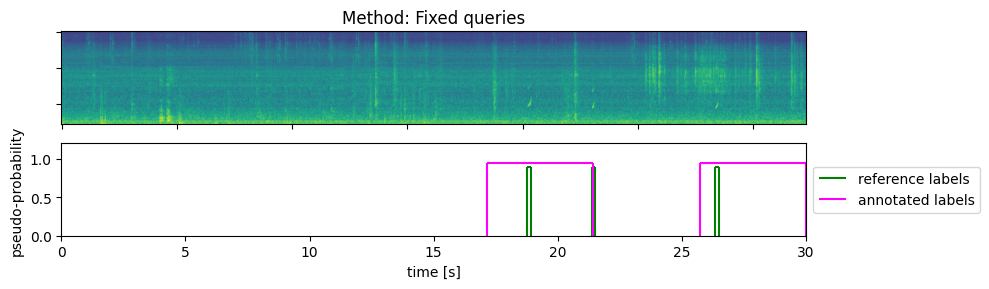

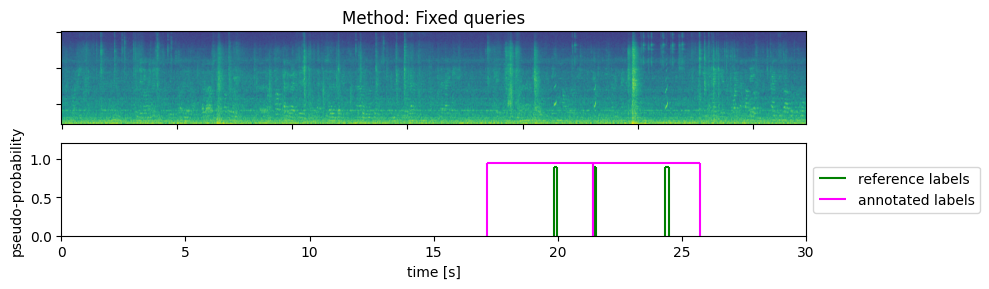

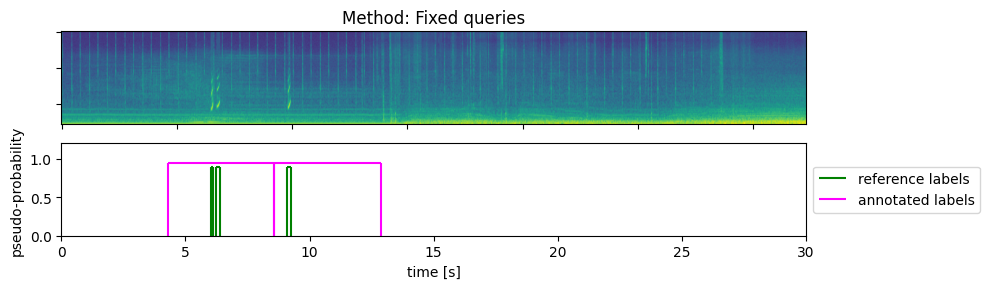

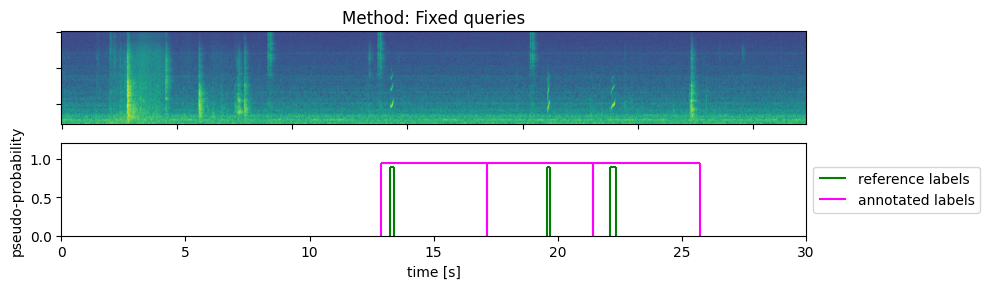

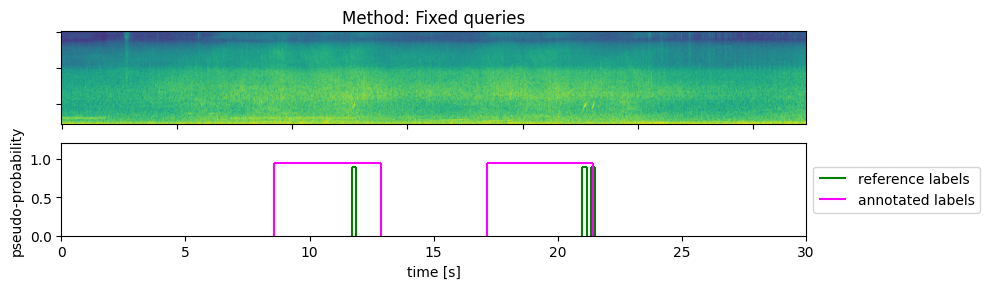

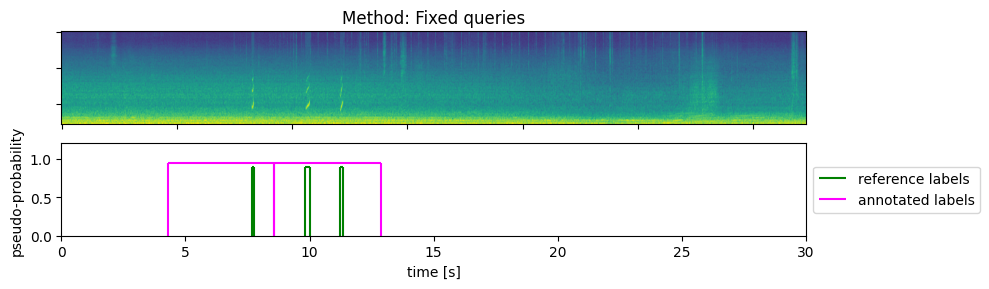

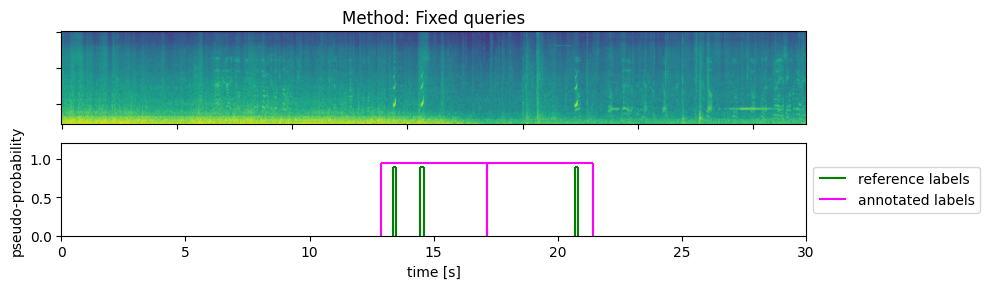

In [250]:
for soundscape_basename in remaining_soundscape_basenames:

    presentation_dir = 'presentation'
    if not os.path.exists(presentation_dir):
        os.makedirs(presentation_dir)
    
    figure_name = 'fixed_labels_{}.png'.format(soundscape_basename)
    savefile    = os.path.join(presentation_dir, figure_name)
    
    visualize.visualize_query_strategy(
        query_strategy_3,
        "Fixed queries",
        soundscape_basename,
        base_dir,
        n_queries,
        vis_probs     = False,
        vis_queries   = False,
        vis_label     = True,
        vis_threshold = False,
        vis_cpd       = False,
        vis_peaks     = False,
        savefile=savefile,
    )

# SNR normalization

In [14]:
from scaper.audio import get_integrated_lufs
import librosa

In [18]:
ref_db = -10 # LUFS

bg_event, sr = librosa.load('/mnt/storage_1/datasets/dcase_bioacoustics_soundscapes/ME/Q/train_source/background/bg/ME2_26.wav')
fg_event, sr = librosa.load('/mnt/storage_1/datasets/dcase_bioacoustics_soundscapes/ME/Q/train_source/foreground/fg/ME2_16.wav')

bg_event = np.expand_dims(bg_event, axis=1)
fg_event = np.expand_dims(fg_event, axis=1)

bg_energy = np.mean(bg_event**2)
fg_energy = np.mean(fg_event**2)

snr_power = fg_energy / bg_energy
snr_db    = 10*np.log10(snr_power)

print("ref_db         = {}".format(ref_db))
#print("SNR_power    = {}".format(snr_power))
#print("SNR_db       = {}".format(snr_db))

# normalize background to ref_db LUFS (as done in Scaper)
bg_lufs = get_integrated_lufs(bg_event, sr)
gain = ref_db - bg_lufs
bg_event_norm = np.exp(gain * np.log(10) / 20) * bg_event

# normalize foreground to SNR (as done in Scaper)
snr = 20
print("SNR_lufs       = {}".format(snr))

bg_lufs_norm = get_integrated_lufs(bg_event_norm, sr)
#print("bg_lufs      = {}".format(bg_lufs))
print("bg_lufs_norm   = {}".format(bg_lufs_norm))

fg_lufs = get_integrated_lufs(fg_event, sr)
gain = ref_db + snr - fg_lufs
fg_event_norm = np.exp(gain * np.log(10) / 20) * fg_event

fg_lufs_norm = get_integrated_lufs(fg_event_norm, sr)
#print("fg_lufs      = {}".format(fg_lufs))
print("fg_lufs_norm   = {}".format(fg_lufs_norm))

bg_energy = np.mean(bg_event_norm**2)
fg_energy = np.mean(fg_event_norm**2)

snr_power = fg_energy / bg_energy
snr_db    = 10*np.log10(snr_power)

#print("SNR_power    = {}".format(snr_power))
print("")
print("SNR_db         = {}".format(snr_db))

ref_db         = -10
SNR_lufs       = 20
bg_lufs_norm   = -10.00000010654961
fg_lufs_norm   = 10.000000010079562

SNR_db         = 21.168208122253418


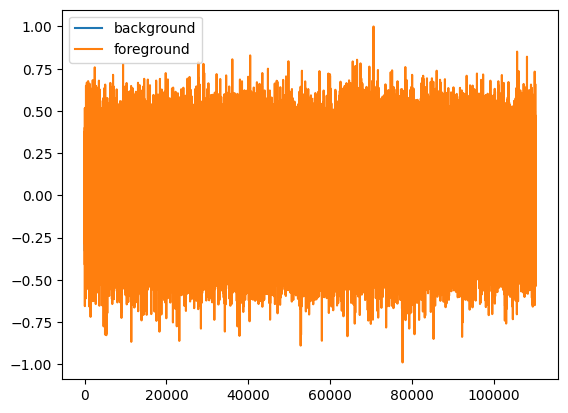

In [118]:
plt.plot(bg_event, label='background')
plt.plot(fg_event, label='foreground')
plt.legend()